# HOG model for feature extraction:

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import io, color
from skimage.transform import resize
image_paths = ["image1.jpg", "image2.jpg", "image3.jpg", "image4.jpg"]

In [2]:
def show_image(image, title):
    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def extract_hog_features(image):
    return hog(image, block_norm='L2-Hys', pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=False)


In [4]:
hog_features_list = []

In [5]:
for path in image_paths:
    image = io.imread(path)
    image_gray = color.rgb2gray(image)  # Convert to grayscale
    hog_features = extract_hog_features(image_gray)
    hog_features_list.append(hog_features)

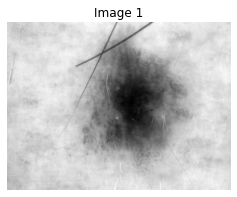

HOG Features for Image 1: [0.22587175 0.08106947 0.20674516 ... 0.11274466 0.11333069 0.22988218]


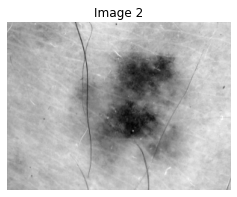

HOG Features for Image 2: [0.06732297 0.01505282 0.09721952 ... 0.02447036 0.15090347 0.01217107]


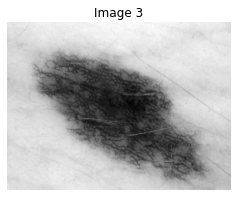

HOG Features for Image 3: [0.26240354 0.20871002 0.15412076 ... 0.15214355 0.12247791 0.17251485]


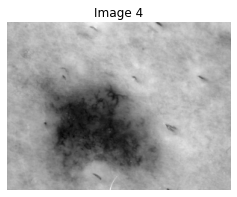

HOG Features for Image 4: [0.2298426  0.08469993 0.02119477 ... 0.13286459 0.16136581 0.10052199]


In [6]:
for i, hog_features in enumerate(hog_features_list, 1):
    show_image(image=color.rgb2gray(resize(io.imread(image_paths[i - 1]), (225, 300))), title=f"Image {i}")
    print(f"HOG Features for Image {i}: {hog_features}")

# CNN model for feature extraction:

In [7]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize
import tensorflow as tf
import tensorflow_hub as hub

In [8]:
vgg_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
vgg_model.trainable = False

In [9]:
image_paths = ["image1.jpg", "image2.jpg", "image3.jpg", "image4.jpg"]

In [10]:
def show_image(image, title):
    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [11]:
def preprocess_image(image_path):
    image = io.imread(image_path)
    image_resized = resize(image, (224, 224))
    image_rgb = color.gray2rgb(image_resized) if image_resized.ndim == 2 else image_resized
    return tf.keras.applications.vgg16.preprocess_input(image_rgb)

In [12]:
def extract_cnn_features(image_path):
    preprocessed_image = preprocess_image(image_path)
    preprocessed_image_batch = tf.expand_dims(preprocessed_image, axis=0)
    features = vgg_model.predict(preprocessed_image_batch)
    return features.flatten()

In [13]:
cnn_features_list = []

In [14]:
for path in image_paths:
    cnn_features = extract_cnn_features(path)
    cnn_features_list.append(cnn_features)

1/1 [==============================] - 0s 159ms/step


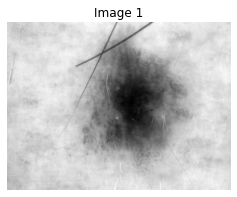

CNN Features for Image 1: [0. 0. 0. ... 0. 0. 0.]


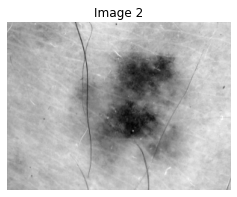

CNN Features for Image 2: [0. 0. 0. ... 0. 0. 0.]


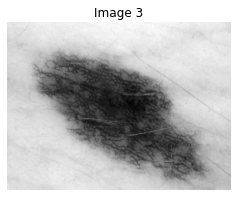

CNN Features for Image 3: [0. 0. 0. ... 0. 0. 0.]


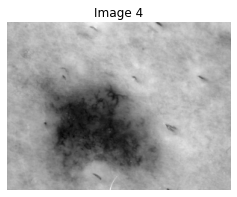

CNN Features for Image 4: [0. 0. 0. ... 0. 0. 0.]


In [15]:
for i, cnn_features in enumerate(cnn_features_list, 1):
    show_image(image=color.rgb2gray(resize(io.imread(image_paths[i - 1]), (225, 300))), title=f"Image {i}")
    print(f"CNN Features for Image {i}: {cnn_features}")

# GLCM model for feature extraction:

In [16]:
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte
import numpy as np

image_paths = ["image1.jpg", "image2.jpg", "image3.jpg", "image4.jpg"]


In [17]:
def show_image(image, title):
    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [18]:
def compute_glcm_features(image):
    # Convert the image to grayscale
    image_gray = color.rgb2gray(image)
    
    # Convert the grayscale image to an unsigned integer type
    image_gray_uint = img_as_ubyte(image_gray)
    
    # Calculate the GLCM with a distance of 1 pixel and 4 different angles
    distances = [1]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm = greycomatrix(image_gray_uint, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
    
    # Calculate some commonly used GLCM properties
    properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
    glcm_features = {prop: greycoprops(glcm, prop)[0, 0] for prop in properties}
    
    return glcm_features

glcm_features_list = []

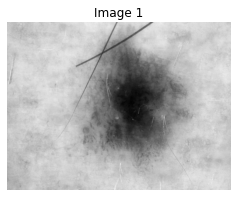

GLCM Features for Image 1:
Contrast: 10.818130217028383
Dissimilarity: 2.1195214245965524
Homogeneity: 0.39045487710278376
Energy: 0.05053531982198135
Correlation: 0.9945371412030983


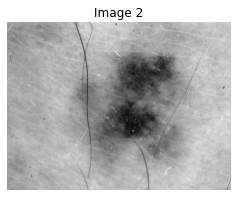

GLCM Features for Image 2:
Contrast: 14.700652940085327
Dissimilarity: 2.2718048599517715
Homogeneity: 0.3807165197706296
Energy: 0.050210115444986936
Correlation: 0.9801575002470735


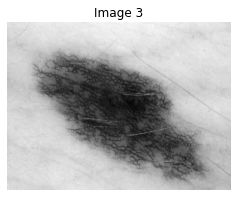

GLCM Features for Image 3:
Contrast: 17.46688554999072
Dissimilarity: 2.855325542570952
Homogeneity: 0.3255553181801229
Energy: 0.03694053664601963
Correlation: 0.9965891779253655


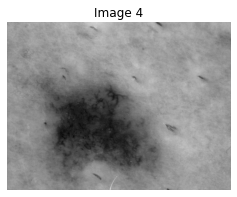

GLCM Features for Image 4:
Contrast: 5.807549619736597
Dissimilarity: 1.7970432201817828
Homogeneity: 0.4105467384691805
Energy: 0.050157233207291235
Correlation: 0.9949222432293453


In [19]:
for path in image_paths:
    image = io.imread(path)
    glcm_features = compute_glcm_features(image)
    glcm_features_list.append(glcm_features)

for i, glcm_features in enumerate(glcm_features_list, 1):
    show_image(image=color.rgb2gray(io.imread(image_paths[i - 1])), title=f"Image {i}")
    print(f"GLCM Features for Image {i}:")
    print("Contrast:", glcm_features['contrast'])
    print("Dissimilarity:", glcm_features['dissimilarity'])
    print("Homogeneity:", glcm_features['homogeneity'])
    print("Energy:", glcm_features['energy'])
    print("Correlation:", glcm_features['correlation'])